# wav file 처리 테스트


In [1]:
'''
# 라이브러리 정의
 - 시스템 라이브러리
 - 오디오 관련 라이브러리
 - 연산 및 Plot 관련 라이브러리 
 - 샤용자 라이브러리
'''

# Import Systems 
import struct
import io
import os
import sys
import time

# Import Audio
import wave
import pyaudio

import numpy as np
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyRoomAcoustic as room
import pyOssDebug as dbg



# 폴더 이름 설정
 - 현재 프로젝트가 있는 폴더의 경로명을 설정
 - 프로젝트 내에 Audio File이 있는 폴더명을 프로젝트 경로와 합쳐 String으로 저장

# 오디오 파일 이름 설정
 - 불러 올 오디오 파일이름과 앞서 설정한 폴더 이름을 1개의 String으로 저장
   

In [ ]:
# Path of audiofiles folder
audio_dir = os.path.join(os.getcwd(), 'impulsefiles')

#print(audio_dir)


In [ ]:
# Define wave file name text to open
# Path + wave file name

#wav_fname = os.path.join(audio_dir, 'TyndallBruceMonument.wav')
#wav_fname = os.path.join(audio_dir, 'ElvedenHallMarbleHall.wav')
#wav_fname = os.path.join(audio_dir, 'EmptyApartmentBedroom.wav')
#wav_fname = os.path.join(audio_dir, 'FalklandPalaceRoyalTennisCourt.wav')
#wav_fname = os.path.join(audio_dir, 'InsidePiano.wav')
#wav_fname = os.path.join(audio_dir, 'MaesHowe.wav')
#wav_fname = os.path.join(audio_dir, 'SportsCentreUniversityOfYork.wav')
#wav_fname = os.path.join(audio_dir, 'StairwayUniversityOfYork.wav')
#wav_fname = os.path.join(audio_dir, 'StAndrewsChurch.wav')
wav_fname = os.path.join(audio_dir, 'mh3_000_ortf_48k.wav')


# Read wav file using module scipy.io.wavflie
- Read wav file
- Plot data

In [ ]:

#wav_samplerate, wav_data = wavfile.read("audiofiles\TyndallBruceMonument.wav")

wav_samplerate, wav_data = wavfile.read(wav_fname)

time = wav_data.shape[0] / wav_samplerate

print(f"Samplerate = {wav_samplerate}")
print(f"Number of Channels = {wav_data.shape[1]}")
print(f"Length = {wav_data.shape[0]}")
print(f"Time = {time} sec")



In [ ]:
# Plot loaded wave file

plot_time = np.linspace(0., time, wav_data.shape[0])

plt.plot(plot_time, wav_data[:, 0], label="Left channel")
plt.plot(plot_time, wav_data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
# save numpy data file

#np.save('ElvedenHallMarbleHall', wav_data)
#np.save(wav_fname, wav_data)


# numpy array 불러오기
- nubpy array로 저장한 오디오 데이터 파일 (.npy)를 불러오기
- 불러온 .npy파일을 plot하여 wav파일과 동일한 지 확인  

In [ ]:
# 
npy_fname = wav_fname + '.npy'

wav_narray = np.load(npy_fname)

#print(f"Samplerate = {wav_samplerate}")
print(f"Number of Channels = {wav_narray.shape[1]}")
print(f"Length = {wav_narray.shape[0]}")
#print(f"Time = {time} sec")



In [ ]:
# Plot npy array

plot_time = np.linspace(0., time, wav_narray.shape[0])

plt.plot(plot_time, wav_narray[:, 0], label="Left channel")
plt.plot(plot_time, wav_narray[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


# Read wav file using module 
- using modified wav file read funcion
- extract wav file header information

1.0
float32 48000
float32 44100
1.0
Audio Format = Int
Number of Channel = 2
Sampling Frequency = 48000
Bits per Sample = 24
Audio Format = float
Number of Channel = 1
Sampling Frequency = 44100
Bits per Sample = 32


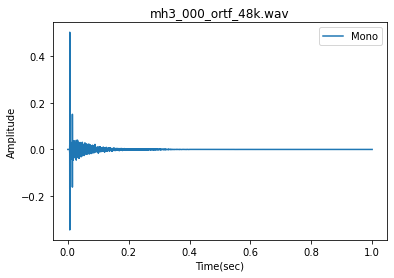

In [2]:
# wavfile(), readf32 검증용

wav_fname = 'mh3_000_ortf_48k'
impulse_fname = pyOssWavfile.str_fname('impulsefiles', wav_fname)

impulse_fmt, impulse_data, impulse_struct_fmt, impulse_time = pyOssWavfile.readf32(impulse_fname)

dbg.dWavInfo(impulse_fname)
dbg.dWavInfo(impulse_struct_fmt)
dbg.dPlotAudio(impulse_struct_fmt.fs, impulse_data, wav_fname + '.wav', "Mono", "Time(sec)", "Amplitude")

4.0


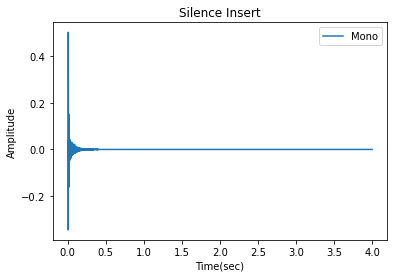

In [3]:
inserted_data = pyOssWavfile.insertSilence(impulse_data, impulse_struct_fmt.fs, 3.0)

print(inserted_data.shape[0]/impulse_struct_fmt.fs)
dbg.dPlotAudio(impulse_struct_fmt.fs, inserted_data, 'Silence Insert', "Mono", "Time(sec)", "Amplitude")

In [ ]:
print(impulse_struct_fmt)

In [ ]:
pyOssWavfile.save_oss_npz(impulse_fname+'_mono_f32_44.1k', impulse_data, impulse_struct_fmt, impulse_time)

In [ ]:
impulse_data2, impulse_struct_fmt2, impulse_time2 = pyOssWavfile.load_oss_npz(impulse_fname+'_mono_f32_44.1k.npz')

dbg.dWavInfo(impulse_struct_fmt)
print(impulse_time)
dbg.dWavInfo(impulse_struct_fmt2)
print(impulse_time2)
dbg.dPlotAudio(impulse_struct_fmt2.fs, impulse_data2, wav_fname + '.wav', "Mono", "Time(sec)", "Amplitude")

In [ ]:
#np.save(impulse_fname+'_mono_f32_44.1k', impulse_data)
# fmt_array = [impulse_struct_fmt.format, impulse_struct_fmt.ch, impulse_struct_fmt.fs, impulse_struct_fmt.bitdepth, impulse_time]
# print(fmt_array)
# np.savez(impulse_fname+'_mono_f32_44.1k', fmt = fmt_array, data=impulse_data)
np.savez(impulse_fname+'_mono_f32_44.1k', format=impulse_struct_fmt.format, ch=impulse_struct_fmt.ch, fs=impulse_struct_fmt.fs, bitdepth=impulse_struct_fmt.bitdepth, t=impulse_time, data=impulse_data)


In [ ]:
impulse_struct_fmt2 = pyOssWavfile.CWavHeaderInfo(0, 0, 0, 0, 0, 0)
impulse_fname2 = impulse_fname+'_mono_f32_44.1k.npz'

with np.load(impulse_fname2) as data_array:
    impulse_struct_fmt2.format = data_array['format']
    impulse_struct_fmt2.ch = data_array['ch']
    impulse_struct_fmt2.fs = data_array['fs']
    impulse_struct_fmt2.bitdepth = data_array['bitdepth']
    impulse_time2 = data_array['t']
    impulse_data2 = data_array['data']

dbg.dWavInfo(impulse_struct_fmt)
dbg.dWavInfo(impulse_struct_fmt2)
dbg.dPlotAudio(impulse_struct_fmt2.fs, impulse_data2, wav_fname + '.wav', "Mono", "Time(sec)", "Amplitude")